<a href="https://colab.research.google.com/github/Aichael29/minesweeper/blob/main/Minesweeper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pylab import *
import matplotlib.pyplot as plt
import os

!pip install pyagrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.config['notebook','default_graph_size']=10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 12.8 MB/s eta 0:00:00


In [ ]:
bn=gum.BayesNet('Minesweeper')

b1, b2, b3, b4 = [bn.add(gum.LabelizedVariable(name,name,2)) for name in ["b1","b2","b3","b4"]]
n1,n4 = [bn.add(gum.LabelizedVariable(name,name,['0','1','b'])) for name in ["n1","n4"]]
n2, n3 = [bn.add(gum.LabelizedVariable(name,name,['0','1','2','b'])) for name in ["n2","n3"]]

print (bn)
bn

BN{nodes: 8, arcs: 0, domainSize: 2304, dim: 14, mem: 176o}


(pyAgrum.BayesNet<double>@0x5b1c4d002dd0) BN{nodes: 8, arcs: 0, domainSize: 2304, dim: 14, mem: 176o}

In [ ]:
for link in [(b1,n1),(b1,n2),(b2,n1),(b2,n2),(b2,n3),(b3,n2),(b3,n3),(b3,n4),(b4,n3),(b4,n4)]:
  bn.addArc(*link)

In [ ]:
print (bn)
bn

BN{nodes: 8, arcs: 10, domainSize: 2304, dim: 68, mem: 768o}


(pyAgrum.BayesNet<double>@0x5b1c4d002dd0) BN{nodes: 8, arcs: 10, domainSize: 2304, dim: 68, mem: 768o}

In [ ]:
bn.cpt(b4).fillWith([0.9,0.1])
bn.cpt(b2).fillWith([0.9,0.1])
bn.cpt(b3).fillWith([0.9,0.1])
bn.cpt(b1)


(pyAgrum.Potential<double>@0x5b1c4cb7de70) 
  b1               |
0        |1        |
---------|---------|
 0.9000  | 0.1000  |

In [ ]:
bn.cpt("n1")[{'b1':0,'b2':0}]=[1,0,0]
bn.cpt("n1")[{'b1':0,'b2':1}]=[0,1,0]
bn.cpt("n1")[{'b1':1,'b2':0}]=[0,0,1]
bn.cpt("n1")[{'b1':1,'b2':1}]=[0,0,1]
bn.cpt("n1")

(pyAgrum.Potential<double>@0x5b1c4ca4b0c0) 
             ||  n1                         |
b1    |b2    ||0        |1        |b        |
------|------||---------|---------|---------|
0     |0     || 1.0000  | 0.0000  | 0.0000  |
1     |0     || 0.0000  | 0.0000  | 1.0000  |
0     |1     || 0.0000  | 1.0000  | 0.0000  |
1     |1     || 0.0000  | 0.0000  | 1.0000  |

In [ ]:
bn.cpt("n2")[{'b2':0,'b1':0,'b3':0}]=[1,0,0,0]
bn.cpt("n2")[{'b2':0,'b1':0,'b3':1}]=[0,1,0,0]
bn.cpt("n2")[{'b2':0,'b1':1,'b3':0}]=[0,1,0,0]
bn.cpt("n2")[{'b2':0,'b1':1,'b3':1}]=[0,0,1,0]
bn.cpt("n2")[{'b2':1,'b1':0,'b3':0}]=[0,0,0,1]
bn.cpt("n2")[{'b2':1,'b1':0,'b3':1}]=[0,0,0,1]
bn.cpt("n2")[{'b2':1,'b1':1,'b3':0}]=[0,0,0,1]
bn.cpt("n2")[{'b2':1,'b1':1,'b3':1}]=[0,0,0,1]
bn.cpt("n2")

(pyAgrum.Potential<double>@0x5b1c4cb0c800) 
                    ||  n2                                   |
b1    |b2    |b3    ||0        |1        |2        |b        |
------|------|------||---------|---------|---------|---------|
0     |0     |0     || 1.0000  | 0.0000  | 0.0000  | 0.0000  |
1     |0     |0     || 0.0000  | 1.0000  | 0.0000  | 0.0000  |
0     |1     |0     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |
1     |1     |0     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |
0     |0     |1     || 0.0000  | 1.0000  | 0.0000  | 0.0000  |
1     |0     |1     || 0.0000  | 0.0000  | 1.0000  | 0.0000  |
0     |1     |1     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |
1     |1     |1     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |

In [ ]:
bn.cpt("n4")[{'b3':0,'b4':0}]=[1,0,0]
bn.cpt("n4")[{'b3':0,'b4':1}]=[0,0,1]
bn.cpt("n4")[{'b3':1,'b4':0}]=[0,1,0]
bn.cpt("n4")[{'b3':1,'b4':1}]=[0,0,1]
bn.cpt("n4")

(pyAgrum.Potential<double>@0x5b1c4cbc34a0) 
             ||  n4                         |
b3    |b4    ||0        |1        |b        |
------|------||---------|---------|---------|
0     |0     || 1.0000  | 0.0000  | 0.0000  |
1     |0     || 0.0000  | 1.0000  | 0.0000  |
0     |1     || 0.0000  | 0.0000  | 1.0000  |
1     |1     || 0.0000  | 0.0000  | 1.0000  |

In [ ]:
bn.cpt("n3")[{'b2':0,'b4':0,'b3':0}]=[1,0,0,0]
bn.cpt("n3")[{'b2':0,'b4':0,'b3':1}]=[0,0,0,1]
bn.cpt("n3")[{'b2':0,'b4':1,'b3':0}]=[0,1,0,0]
bn.cpt("n3")[{'b2':0,'b4':1,'b3':1}]=[0,0,0,1]
bn.cpt("n3")[{'b2':1,'b4':0,'b3':0}]=[0,1,0,0]
bn.cpt("n3")[{'b2':1,'b4':0,'b3':1}]=[0,0,0,1]
bn.cpt("n3")[{'b2':1,'b4':1,'b3':0}]=[0,0,1,0]
bn.cpt("n3")[{'b2':1,'b4':1,'b3':1}]=[0,0,0,1]
bn.cpt("n3")

(pyAgrum.Potential<double>@0x5b1c4ca4b5c0) 
                    ||  n3                                   |
b2    |b3    |b4    ||0        |1        |2        |b        |
------|------|------||---------|---------|---------|---------|
0     |0     |0     || 1.0000  | 0.0000  | 0.0000  | 0.0000  |
1     |0     |0     || 0.0000  | 1.0000  | 0.0000  | 0.0000  |
0     |1     |0     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |
1     |1     |0     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |
0     |0     |1     || 0.0000  | 1.0000  | 0.0000  | 0.0000  |
1     |0     |1     || 0.0000  | 0.0000  | 1.0000  | 0.0000  |
0     |1     |1     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |
1     |1     |1     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |

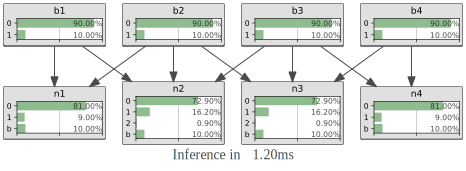

In [ ]:
gnb.showInference(bn,evs={})

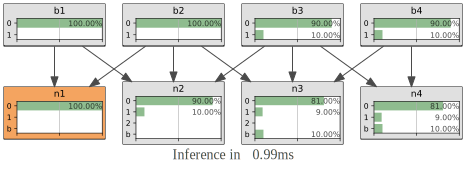

In [ ]:
gnb.showInference(bn,evs={'n1':0})